In [1]:
from IPython.display import HTML

HTML("""
<style>
/* Estilo para todas as células Markdown */
div.text_cell_render {
    background-color: #e6f2ff;
    border-left: 6px solid #004080;
    padding: 20px;
    font-family: 'Segoe UI', sans-serif;
    color: #003366;
}

/* Títulos */
div.text_cell_render h1 {
    color: #004080;
    border-bottom: 2px solid #004080;
    padding-bottom: 5px;
}

div.text_cell_render h2 {
    color: #003366;
    margin-top: 20px;
}

div.text_cell_render h3 {
    color: #002244;
    margin-top: 15px;
}

/* Links */
div.text_cell_render a {
    color: #0066cc;
    text-decoration: none;
}

div.text_cell_render a:hover {
    text-decoration: underline;
}

/* Parágrafos */
div.text_cell_render p {
    line-height: 1.6;
    font-size: 16px;
}
</style>
""")

# Projeto de Classificação do Tipo de Clima

- Vinícius Rodrigues dos Santos
---

## 1. Compreensão do Negócio

Este projeto de ciência de dados tem como objetivo **classificar o tipo de clima** com base em dados meteorológicos sintéticos. O modelo busca prever se o clima será: **Chuvoso**, **Ensolarado**, **Nublado** ou **Nevando**.

- **Nome do Dataset**: Classificação do tipo de clima
- **Estrutura**: Composta por 11 colunas:
    - **Temperature**: Temperatura em graus Celsius
    - **Humidity**: Umidade relativa do ar (%)
    - **Wind Speed**: Velocidade do vento
    - **Precipitation (%)**: Probabilidade de precipitação
    - **Cloud Cover**: Nível de cobertura de nuvens
    - **Atmospheric Pressure**: Pressão atmosférica
    - **UV Index**: Índice de radiação ultravioleta
    - **Season**: Estação do ano
    - **Visibility** (km): Visibilidade em quilômetros
    - **Location**: Local de coleta dos dados
    - **Weather Type**: Variável alvo (Chuva, Sol, Nublado, Nevando)

- **Objetivo**: Classificar o clima em: Chuvoso, Ensolarado, Nublado ou Nevado
- **Metodologia**: Utilização de modelo de aprendizagem supervisionada para classificação  
- **Público-alvo**: Estudantes, Serviços de previsão do tempo, industria agrícola, público em geral
- **Critério de sucesso**: Acurácia de no minímo 90%  
- **Limitação**: Por se tratar de dados sintéticos, o estudo pode apresentar viés
- **Link do dataset**: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

- **Importar as bibliotecas que serão utilizadas no projeto**


In [29]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

---
## 2. Preparação dos Dados

Nesta etapa, os dados foram tratados para garantir a qualidade do modelo.

* **Tratamento de Outliers**: Valores de umidade acima de 100 foram removidos. Outliers em outras colunas (`Wind Speed`, `Precipitation (%)`, `Visibility (km)`) foram tratados usando a técnica de **Intervalo Interquartil (IQR)**.
* **Limpeza**: Dados duplicados e nulos foram removidos.
* **Engenharia de Features**: Colunas categóricas (`Cloud Cover`, `Season`, `Location`, `Weather Type`) foram convertidas para valores numéricos usando `LabelEncoder`.


2.1 **Importar a base de dados**

In [30]:
baseDados = pd.read_csv('weather_classification_data.csv', sep=',')

2.2 **Estrutura da base de dados**


- Quantidade de linhas e colunas da base de dados

In [31]:
print(baseDados.shape)

(13200, 11)


- Visualizar as primeiras 5 linhas da base de dados

In [32]:
print(baseDados.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


- Visualizar as últimas 5 linhas da base de dados


In [33]:
print(baseDados.tail())

       Temperature  Humidity  Wind Speed  Precipitation (%) Cloud Cover  \
13195         10.0        74        14.5               71.0    overcast   
13196         -1.0        76         3.5               23.0      cloudy   
13197         30.0        77         5.5               28.0    overcast   
13198          3.0        76        10.0               94.0    overcast   
13199         -5.0        38         0.0               92.0    overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
13195               1003.15         1  Summer              1.0  mountain   
13196               1067.23         1  Winter              6.0   coastal   
13197               1012.69         3  Autumn              9.0   coastal   
13198                984.27         0  Winter              2.0    inland   
13199               1015.37         5  Autumn             10.0  mountain   

      Weather Type  
13195        Rainy  
13196        Snowy  
13197       Cloudy  
13198   

- Verificar nome das colunas, quantidade de linhas não nulas, tipo de dados

In [34]:
print(baseDados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None


- Estatísticas descritivas das colunas númericas

In [35]:
print(baseDados.describe())

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%

2.3 **Gráficos**

- Barras

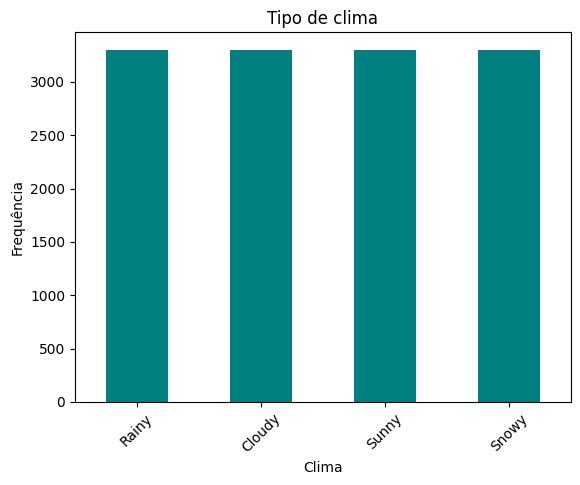

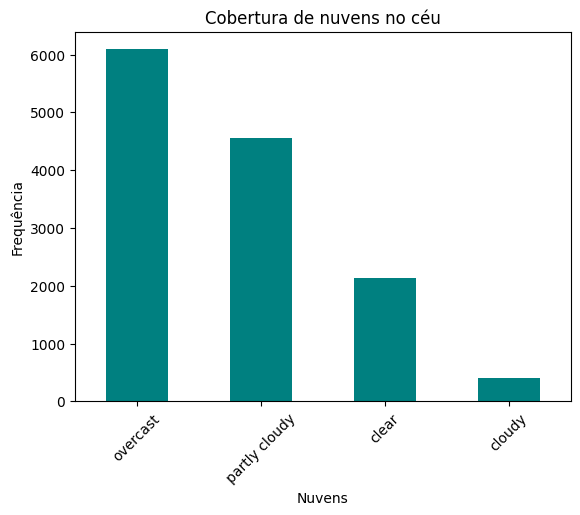

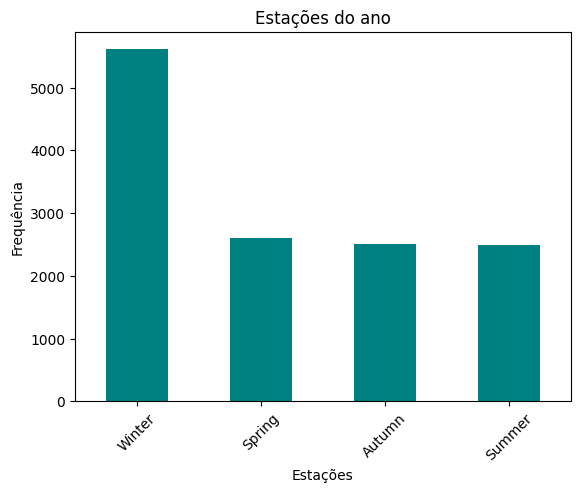

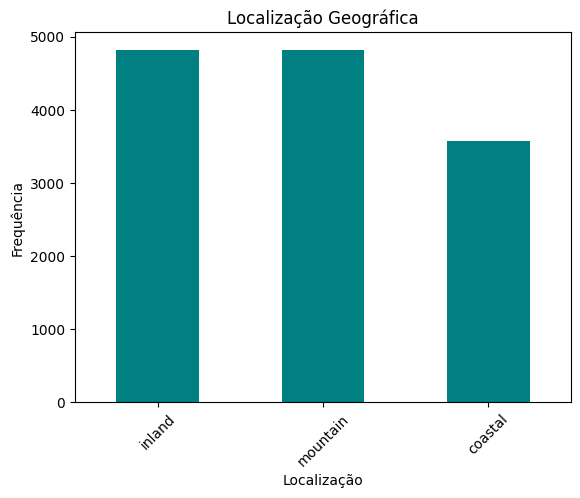

In [36]:
target = baseDados['Weather Type'].value_counts()
target.plot(kind='bar', color='teal')
plt.title('Tipo de clima')
plt.xlabel('Clima')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


nuvens = baseDados['Cloud Cover'].value_counts()
nuvens.plot(kind='bar', color='teal')
plt.title('Cobertura de nuvens no céu')
plt.xlabel('Nuvens')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

estacaoAno = baseDados['Season'].value_counts()
estacaoAno.plot(kind='bar', color='teal')
plt.title('Estações do ano')
plt.xlabel('Estações')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

localizacao = baseDados['Location'].value_counts()
localizacao.plot(kind='bar', color='teal')
plt.title('Localização Geográfica')
plt.xlabel('Localização')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

- Histogramas

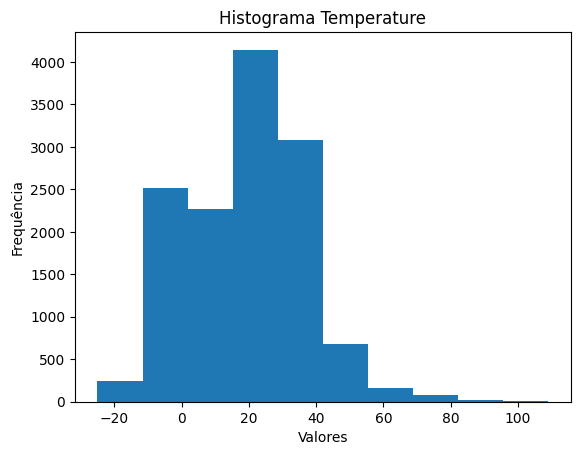

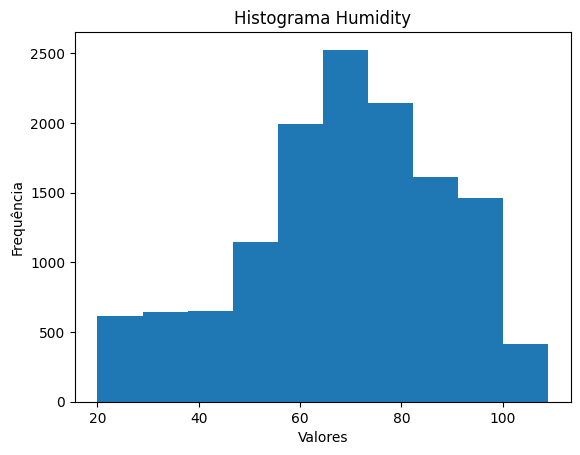

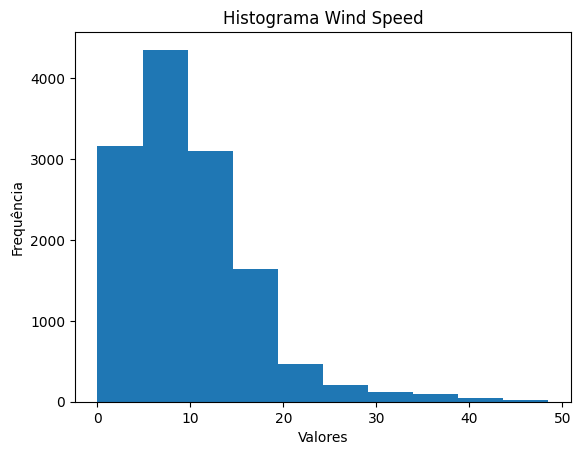

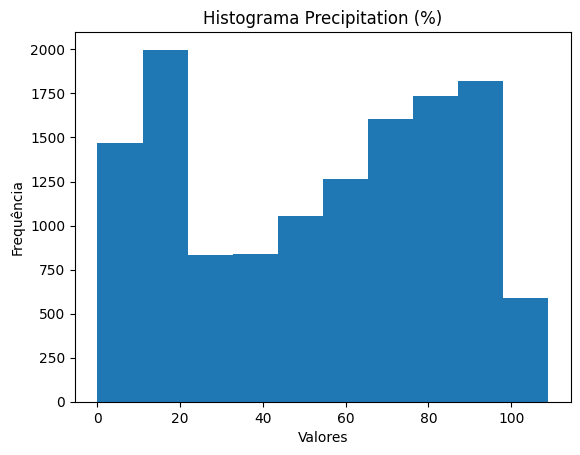

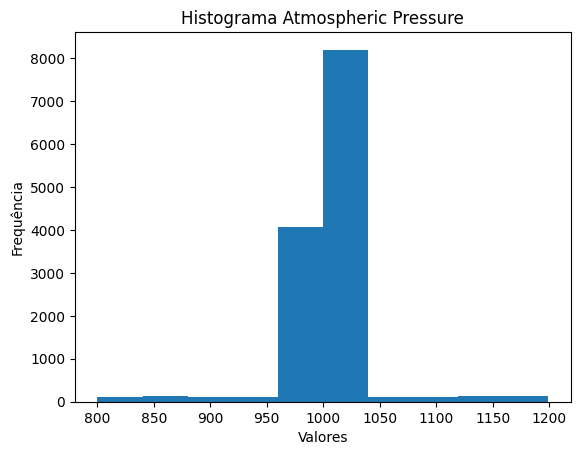

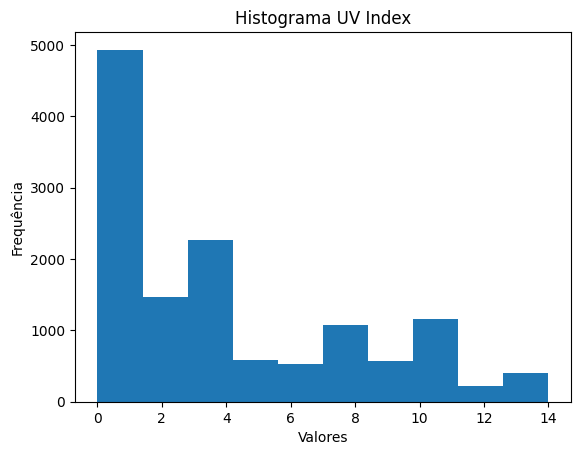

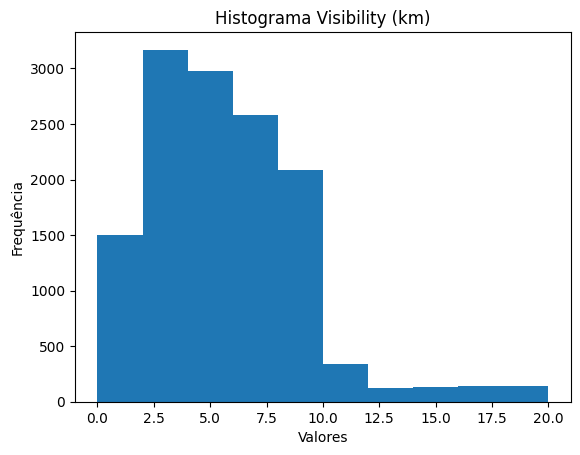

In [37]:
colunasNumericas = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
for coluna in colunasNumericas:
    plt.hist(baseDados[coluna])
    plt.title(f'Histograma {coluna}')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.show()

- Boxplot

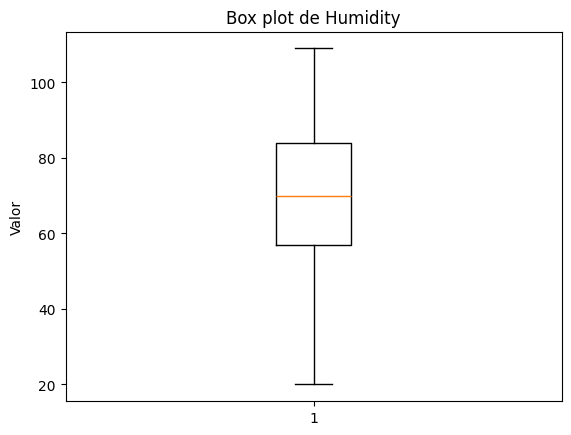

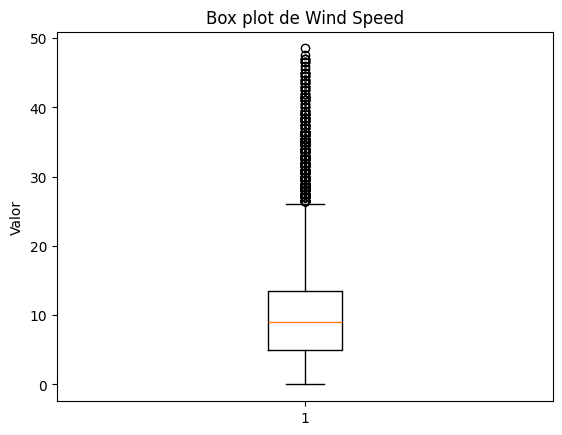

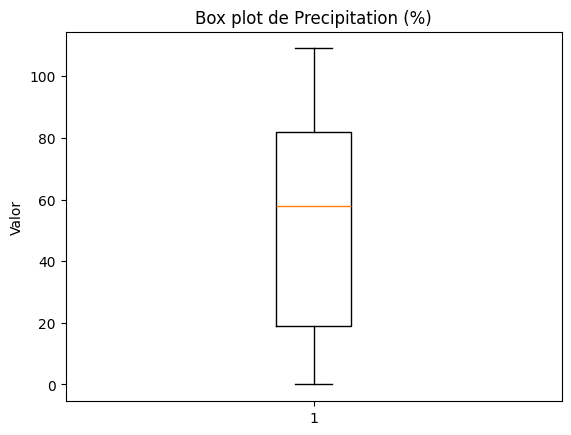

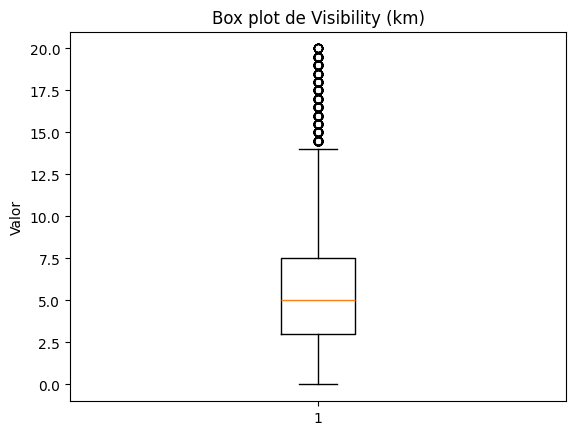

In [38]:
colunasOutlaiers = ['Humidity', 'Wind Speed', 'Precipitation (%)', 'Visibility (km)']
for coluna in colunasOutlaiers:
    plt.boxplot(baseDados[coluna])
    plt.title(f'Box plot de {coluna}')
    plt.ylabel('Valor')
    plt.show()

- Remover valores de umidade acima de 100

In [39]:
baseDados = baseDados[baseDados['Humidity'] <= 100]

- Tratar demias outlaiers com interquartile

In [40]:
def calcular_iqr(baseDados, coluna):
    #valores abaixo dos 25% 
    Q1 = baseDados[coluna].quantile(0.25)
    # valores abaixo de 75%
    Q3 = baseDados[coluna].quantile(0.75)
    # calcula a dispersão dos dados centrais
    IQR = Q3 - Q1
    # define limite inferior
    limite_inferior = Q1 - 1.5 * IQR
    # define limite superior
    limite_superior = Q3 + 1.5 * IQR
    baseDados = baseDados[(baseDados[coluna] >= limite_inferior) & (baseDados[coluna] <= limite_superior)]
    return baseDados

baseDados = calcular_iqr(baseDados, 'Wind Speed')
baseDados = calcular_iqr(baseDados, 'Precipitation (%)')
baseDados = calcular_iqr(baseDados, 'Visibility (km)')

- Verificar como ficaram as linhas após o tratamento de outlaiers

In [41]:
baseDados.shape

(12088, 11)

---

## 3. Modelagem e Treinamento

Foram testados cinco algoritmos de classificação supervisionada para encontrar o melhor desempenho.

* `RandomForestClassifier`
* `DecisionTreeClassifier`
* `GaussianNB`
* `GradientBoostingClassifier`
* `SVM (Support Vector Machine)`

O conjunto de dados foi dividido em **70% para treinamento** e **30% para teste**, com o objetivo de avaliar a capacidade de generalização dos modelos.


- Remover dados duplicados

In [42]:
baseDados.drop_duplicates(inplace=True)

- Remover dados nulos

In [43]:
baseDados.dropna(inplace=True)

- Verificar como ficou a quantidade de linhas e colunas após as alterações

In [44]:
print(baseDados.shape)

(12088, 11)


- Transformar colunas para int

In [45]:
baseDados['Temperature'] = baseDados['Temperature'].astype(int)
baseDados['Wind Speed'] = baseDados['Wind Speed'].astype(int)
baseDados['Precipitation (%)'] = baseDados['Precipitation (%)'].astype(int)

- Transformar colunas object para numéricas

In [46]:
baseDados['Cloud Cover'] = LabelEncoder().fit_transform(baseDados['Cloud Cover'])
baseDados['Season'] = LabelEncoder().fit_transform(baseDados['Season'])
baseDados['Location'] = LabelEncoder().fit_transform(baseDados['Location'])
baseDados['Weather Type'] = LabelEncoder().fit_transform(baseDados['Weather Type'])

- Separar base de dados em teste e treino

In [47]:
target = baseDados['Weather Type']
features = baseDados.drop('Weather Type', axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, train_size=0.7, shuffle=True, random_state=42, stratify=target)

---

## 4. Avaliação e Resultados

O desempenho dos modelos foi medido pela métrica de **acurácia**.

* **Modelo Vencedor**: O `RandomForestClassifier` apresentou a melhor performance.
* **Resultado**: O modelo alcançou uma acurácia de **94%**, superando o critério de sucesso do projeto.

- Algoritmos selecionados

In [48]:
algoritmosSelecionados = [RandomForestClassifier(n_estimators=100), DecisionTreeClassifier(), GaussianNB(), GradientBoostingClassifier(n_estimators=100), svm.SVC()]

- Treinar modelo

In [49]:
modelos = []
for algoritmo in algoritmosSelecionados:
    algoritmo.fit(x_train, y_train)
    modelos.append(algoritmo)

- Realizar a predição de cada modelo selecionado

In [50]:
predicoes = []
for modelo in modelos:
     predicaoModelo = modelo.predict(x_test)
     predicoes.append(predicaoModelo)

- Calcular e encontrar a maior acurácia

In [51]:
acuracia = []
for predicaoModelo in predicoes:
    calcularAcuracia = accuracy_score(predicaoModelo, y_test)
    acuracia.append(calcularAcuracia)
print(acuracia)
indexModelo = acuracia.index(max(acuracia))
modelo = modelos[indexModelo]
# print(modelo)
print(f'Melhor acurácia encontrada:\n{modelo}: {round(max(acuracia), 2)}%')

[0.938240970499035, 0.931899641577061, 0.8982630272952854, 0.9360352908740005, 0.8569065343258891]
Melhor acurácia encontrada:
RandomForestClassifier(): 0.94%


- Salvar o modelo

In [52]:
nomeModelo = 'modelo_selecionado_clima.pickle'
with open(nomeModelo, 'wb') as file:
    pickle.dump(modelo, file)

- Carregar modelo

In [53]:
with open(nomeModelo, 'rb') as file:
        modelo = pickle.load(file)

- Validar modelo

In [54]:
validarModelo = modelo.predict(x_test)
print(f'Predição:\n{validarModelo}')

Predição:
[1 0 0 ... 3 2 1]


- Matriz de confusão

In [ ]:
targetTeste = y_test
targetPredicao = validarModelo
matrizConfusao = confusion_matrix(targetTeste, targetPredicao)
print(f'Matriz de confusão:\n{matrizConfusao}')

Matriz de confusão:
[[875  22   7  15]
 [ 36 818   7  20]
 [ 26  15 832  22]
 [ 31  10  13 878]]


---

## 5. Conclusão

O `RandomForestClassifier` se mostrou um modelo robusto e eficaz para a classificação do clima. Com uma acurácia de 94%, ele atende e supera as expectativas do projeto, demonstrando seu potencial para aplicações práticas em previsão do tempo.


